In [1]:
import pandas as pd
import pandas._testing as tm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def unpivot(frame):
    N, K = frame.shape
    data = {
        "value": frame.to_numpy().ravel("F"),
        "variable": np.asarray(frame.columns).repeat(N),
        "date": np.tile(np.asarray(frame.index), K),
    }
    return pd.DataFrame(data, columns=["date", "variable", "value"])

In [3]:
df = unpivot(tm.makeTimeDataFrame(3))
df

,date,variable,value
0,2000-01-03,A,1.132760
1,2000-01-04,A,-0.285978
2,2000-01-05,A,-0.343899
3,2000-01-03,B,-0.977727
4,2000-01-04,B,0.313935
5,2000-01-05,B,1.050038
6,2000-01-03,C,0.072983
7,2000-01-04,C,0.685677
8,2000-01-05,C,1.188177
9,2000-01-03,D,-2.563457


In [4]:
f = df['variable'] == "A"
df.loc[f]

,date,variable,value
0,2000-01-03,A,1.132760
1,2000-01-04,A,-0.285978
2,2000-01-05,A,-0.343899


In [6]:
pivoted = df.pivot(index="date", columns="variable", values="value")
pivoted

variable,A,B,C,D
date,,,,
2000-01-03,1.132760,-0.977727,0.072983,-2.563457
2000-01-04,-0.285978,0.313935,0.685677,-0.458645
2000-01-05,-0.343899,1.050038,1.188177,0.566361


In [8]:
pt= df.pivot_table(index="date", columns="variable", values="value", aggfunc='sum')
pt

variable,A,B,C,D
date,,,,
2000-01-03,1.132760,-0.977727,0.072983,-2.563457
2000-01-04,-0.285978,0.313935,0.685677,-0.458645
2000-01-05,-0.343899,1.050038,1.188177,0.566361


In [11]:
pivoted["A"][0]

1.1327600944105296

In [12]:
pt['A'][1]

-0.28597759820084195

In [17]:
df["value2"] = df["value"] * 2

In [13]:
df

,date,variable,value
0,2000-01-03,A,1.132760
1,2000-01-04,A,-0.285978
2,2000-01-05,A,-0.343899
3,2000-01-03,B,-0.977727
4,2000-01-04,B,0.313935
5,2000-01-05,B,1.050038
6,2000-01-03,C,0.072983
7,2000-01-04,C,0.685677
8,2000-01-05,C,1.188177
9,2000-01-03,D,-2.563457


In [14]:
pivoted = df.pivot(index="date", columns="variable")
pivoted


value                              
variable           A         B         C         D
date                                              
2000-01-03  1.132760 -0.977727  0.072983 -2.563457
2000-01-04 -0.285978  0.313935  0.685677 -0.458645
2000-01-05 -0.343899  1.050038  1.188177  0.566361

In [18]:
pivoted['value']['C']

date
2000-01-03    0.072983
2000-01-04    0.685677
2000-01-05    1.188177
Name: C, dtype: float64

In [19]:
pt = df.pivot_table(index="date", columns="variable", aggfunc='sum')
pt

value                              
variable           A         B         C         D
date                                              
2000-01-03  1.132760 -0.977727  0.072983 -2.563457
2000-01-04 -0.285978  0.313935  0.685677 -0.458645
2000-01-05 -0.343899  1.050038  1.188177  0.566361

In [26]:
pt['value']['C']['2000-01-05']

1.1881769487065208

In [27]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)

tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [28]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -0.457824  0.421327
      two    -0.114148  1.270806
baz   one     0.583922 -0.523383
      two    -1.137373  0.036993
foo   one     0.294652 -0.799168
      two     0.034717 -1.223144
qux   one     2.013811 -0.532687
      two    -0.126265  1.026664

In [29]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.457824  0.421327
      two    -0.114148  1.270806
baz   one     0.583922 -0.523383
      two    -1.137373  0.036993

In [25]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.832144
               B   -0.654453
       two     A   -0.594593
               B   -0.157936
baz    one     A   -0.861097
               B    0.245022
       two     A    0.638153
               B   -1.427784
dtype: float64

In [26]:
stacked.unstack()

A         B
first second                    
bar   one     0.832144 -0.654453
      two    -0.594593 -0.157936
baz   one    -0.861097  0.245022
      two     0.638153 -1.427784

In [27]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.832144 -0.594593
      B -0.654453 -0.157936
baz   A -0.861097  0.638153
      B  0.245022 -1.427784

In [28]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.832144 -0.861097
       B -0.654453  0.245022
two    A -0.594593  0.638153
       B -0.157936 -1.427784

In [29]:
stacked.unstack("second")

second        one       two
first                      
bar   A  0.832144 -0.594593
      B -0.654453 -0.157936
baz   A -0.861097  0.638153
      B  0.245022 -1.427784

In [30]:
stacked.unstack("first")

first          bar       baz
second                      
one    A  0.832144 -0.861097
       B -0.654453  0.245022
two    A -0.594593  0.638153
       B -0.157936 -1.427784

In [30]:
columns = pd.MultiIndex.from_tuples(
    [
        ("Yellow", "cat", "long"),
        ("Black", "cat", "long"),
        ("Yellow", "dog", "short"),
        ("Black", "dog", "short"),
    ],
    names=["color", "animal", "hair_length"],
)

columns

MultiIndex([('Yellow', 'cat',  'long'),
            ( 'Black', 'cat',  'long'),
            ('Yellow', 'dog', 'short'),
            ( 'Black', 'dog', 'short')],
           names=['color', 'animal', 'hair_length'])

In [31]:
df = pd.DataFrame(np.random.randn(4, 4), columns=columns)
df

color,Yellow,Black,Yellow,Black
animal,cat,cat,dog,dog
hair_length,long,long,short,short
0,-1.367477,-0.463342,0.259441,0.411916
1,0.676118,-1.883015,0.111461,1.481765
2,-1.841904,-0.844152,0.212121,0.428451
3,-0.058975,0.453977,-2.268516,-1.382934


In [38]:
df.stack(level=["animal", "hair_length"])

color                    Black    Yellow
  animal hair_length                    
0 cat    long        -0.146367 -0.596943
  dog    short        1.797354  0.044947
1 cat    long         0.108212  0.074183
  dog    short        1.080253  0.472121
2 cat    long        -0.453067 -0.408971
  dog    short       -0.599227 -0.150814
3 cat    long         0.268852 -0.857367
  dog    short        0.542415  1.007782

In [41]:
df.stack(level=[1, 2])

color                    Black    Yellow
  animal hair_length                    
0 cat    long        -0.146367 -0.596943
  dog    short        1.797354  0.044947
1 cat    long         0.108212  0.074183
  dog    short        1.080253  0.472121
2 cat    long        -0.453067 -0.408971
  dog    short       -0.599227 -0.150814
3 cat    long         0.268852 -0.857367
  dog    short        0.542415  1.007782

In [39]:
df.stack(level=["animal", "color"])

hair_length          long     short
  animal color                     
0 cat    Black  -0.146367       NaN
         Yellow -0.596943       NaN
  dog    Black        NaN  1.797354
         Yellow       NaN  0.044947
1 cat    Black   0.108212       NaN
         Yellow  0.074183       NaN
  dog    Black        NaN  1.080253
         Yellow       NaN  0.472121
2 cat    Black  -0.453067       NaN
         Yellow -0.408971       NaN
  dog    Black        NaN -0.599227
         Yellow       NaN -0.150814
3 cat    Black   0.268852       NaN
         Yellow -0.857367       NaN
  dog    Black        NaN  0.542415
         Yellow       NaN  1.007782

In [40]:
df.stack(level=["animal"])

color           Black              Yellow          
hair_length      long     short      long     short
  animal                                           
0 cat       -0.146367       NaN -0.596943       NaN
  dog             NaN  1.797354       NaN  0.044947
1 cat        0.108212       NaN  0.074183       NaN
  dog             NaN  1.080253       NaN  0.472121
2 cat       -0.453067       NaN -0.408971       NaN
  dog             NaN -0.599227       NaN -0.150814
3 cat        0.268852       NaN -0.857367       NaN
  dog             NaN  0.542415       NaN  1.007782

In [32]:
columns = pd.MultiIndex.from_tuples(
    [
        ("A", "cat"),
        ("B", "dog"),
        ("B", "cat"),
        ("A", "dog"),
    ],
    names=["exp", "animal"],
)


In [34]:
index = pd.MultiIndex.from_product(
    [("bar", "baz", "foo", "qux"), ("one", "two")], names=["first", "second"]
)
df = pd.DataFrame(np.random.randn(8, 4), index=index, columns=columns)
df

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -0.770352  1.493323 -0.883615 -0.939936
      two     0.430535 -0.384392  0.149378 -0.368638
baz   one     0.003046  0.117358  1.061489  0.877885
      two     0.228867  2.341936  1.867041  0.312284
foo   one    -0.875412 -0.410547 -0.990700  0.870818
      two    -0.595693 -0.820395 -1.077179  1.109183
qux   one     0.373948 -0.863220 -0.530915  0.973588
      two     0.344803 -1.075012 -0.280610 -0.963772

In [35]:
df2 = df.iloc[[0, 1, 2, 4, 5, 7]]
df2

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -0.770352  1.493323 -0.883615 -0.939936
      two     0.430535 -0.384392  0.149378 -0.368638
baz   one     0.003046  0.117358  1.061489  0.877885
foo   one    -0.875412 -0.410547 -0.990700  0.870818
      two    -0.595693 -0.820395 -1.077179  1.109183
qux   two     0.344803 -1.075012 -0.280610 -0.963772

In [36]:
df2.stack("exp")

animal                 cat       dog
first second exp                    
bar   one    A   -0.770352 -0.939936
             B   -0.883615  1.493323
      two    A    0.430535 -0.368638
             B    0.149378 -0.384392
baz   one    A    0.003046  0.877885
             B    1.061489  0.117358
foo   one    A   -0.875412  0.870818
             B   -0.990700 -0.410547
      two    A   -0.595693  1.109183
             B   -1.077179 -0.820395
qux   two    A    0.344803 -0.963772
             B   -0.280610 -1.075012

In [40]:
df2

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -0.770352  1.493323 -0.883615 -0.939936
      two     0.430535 -0.384392  0.149378 -0.368638
baz   one     0.003046  0.117358  1.061489  0.877885
foo   one    -0.875412 -0.410547 -0.990700  0.870818
      two    -0.595693 -0.820395 -1.077179  1.109183
qux   two     0.344803 -1.075012 -0.280610 -0.963772

In [42]:
df.stack(['exp', 'animal'])

first  second  exp  animal
bar    one     A    cat      -0.770352
                    dog      -0.939936
               B    cat      -0.883615
                    dog       1.493323
       two     A    cat       0.430535
                    dog      -0.368638
               B    cat       0.149378
                    dog      -0.384392
baz    one     A    cat       0.003046
                    dog       0.877885
               B    cat       1.061489
                    dog       0.117358
       two     A    cat       0.228867
                    dog       0.312284
               B    cat       1.867041
                    dog       2.341936
foo    one     A    cat      -0.875412
                    dog       0.870818
               B    cat      -0.990700
                    dog      -0.410547
       two     A    cat      -0.595693
                    dog       1.109183
               B    cat      -1.077179
                    dog      -0.820395
qux    one     A    cat       0.37394

In [44]:
df2.stack("animal")

exp                         A         B
first second animal                    
bar   one    cat    -0.770352 -0.883615
             dog    -0.939936  1.493323
      two    cat     0.430535  0.149378
             dog    -0.368638 -0.384392
baz   one    cat     0.003046  1.061489
             dog     0.877885  0.117358
foo   one    cat    -0.875412 -0.990700
             dog     0.870818 -0.410547
      two    cat    -0.595693 -1.077179
             dog     1.109183 -0.820395
qux   two    cat     0.344803 -0.280610
             dog    -0.963772 -1.075012

In [45]:
df3 = df.iloc[[0, 1, 4, 7], [1, 2]]
df3

exp                  B          
animal             dog       cat
first second                    
bar   one     1.493323 -0.883615
      two    -0.384392  0.149378
foo   one    -0.410547 -0.990700
qux   two    -1.075012 -0.280610

<Axes: ylabel='first,second'>

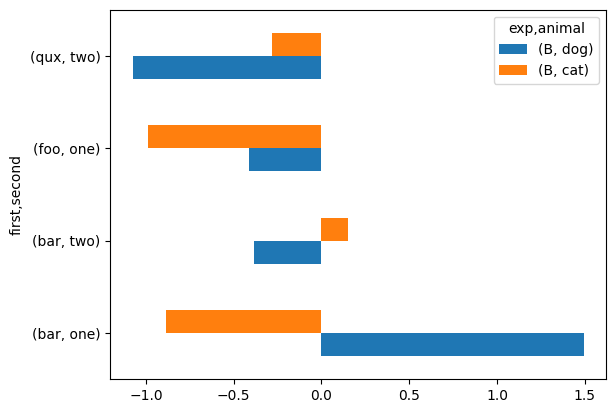

In [46]:
df3.plot(kind='barh')

In [47]:
df3.unstack()

exp            B                              
animal       dog                 cat          
second       one       two       one       two
first                                         
bar     1.493323 -0.384392 -0.883615  0.149378
foo    -0.410547       NaN -0.990700       NaN
qux          NaN -1.075012       NaN -0.280610

In [48]:
df3.unstack(fill_value=0.0)

exp            B                              
animal       dog                 cat          
second       one       two       one       two
first                                         
bar     1.493323 -0.384392 -0.883615  0.149378
foo    -0.410547  0.000000 -0.990700  0.000000
qux     0.000000 -1.075012  0.000000 -0.280610

In [54]:
df

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -1.375657 -0.587075 -1.579066 -0.023824
      two     0.216056  0.165542  0.561146 -0.746482
baz   one    -0.494231 -0.298895 -0.959721 -1.111398
      two     0.629987 -0.855019 -1.496111  0.440739
foo   one     0.611614  1.422667  0.752285 -0.077045
      two     0.086848  1.200350 -2.590267  0.848023
qux   one    -0.029939  0.360570  0.425770  1.595430
      two     0.140803 -1.525667  2.325391 -0.205127

In [49]:
df[:3]

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -0.770352  1.493323 -0.883615 -0.939936
      two     0.430535 -0.384392  0.149378 -0.368638
baz   one     0.003046  0.117358  1.061489  0.877885

In [50]:
df[:3].unstack(0)

exp            A                   B                                       A  \
animal       cat                 dog                 cat                 dog   
first        bar       baz       bar       baz       bar       baz       bar   
second                                                                         
one    -0.770352  0.003046  1.493323  0.117358 -0.883615  1.061489 -0.939936   
two     0.430535       NaN -0.384392       NaN  0.149378       NaN -0.368638   

exp               
animal            
first        baz  
second            
one     0.877885  
two          NaN

In [51]:
df2

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -0.770352  1.493323 -0.883615 -0.939936
      two     0.430535 -0.384392  0.149378 -0.368638
baz   one     0.003046  0.117358  1.061489  0.877885
foo   one    -0.875412 -0.410547 -0.990700  0.870818
      two    -0.595693 -0.820395 -1.077179  1.109183
qux   two     0.344803 -1.075012 -0.280610 -0.963772

In [52]:
df2.unstack(1)

exp            A                   B                                       A  \
animal       cat                 dog                 cat                 dog   
second       one       two       one       two       one       two       one   
first                                                                          
bar    -0.770352  0.430535  1.493323 -0.384392 -0.883615  0.149378 -0.939936   
baz     0.003046       NaN  0.117358       NaN  1.061489       NaN  0.877885   
foo    -0.875412 -0.595693 -0.410547 -0.820395 -0.990700 -1.077179  0.870818   
qux          NaN  0.344803       NaN -1.075012       NaN -0.280610       NaN   

exp               
animal            
second       two  
first             
bar    -0.368638  
baz          NaN  
foo     1.109183  
qux    -0.963772

In [53]:
cheese = pd.DataFrame(
    {
        "first": ["John", "Mary"],
        "last": ["Doe", "Bo"],
        "height": [5.5, 6.0],
        "weight": [130, 150],
    }
)
cheese

,first,last,height,weight
0,John,Doe,5.5,130
1,Mary,Bo,6.0,150


In [60]:
cheese.melt(id_vars=["first", "last"])

,first,last,variable,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [54]:
melted = cheese.melt(id_vars=["first", "last"], var_name="quantity")
melted

,first,last,quantity,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [55]:
melted['name'] = melted['first'] + ' ' + melted['last']
melted

,first,last,quantity,value,name
0,John,Doe,height,5.5,John Doe
1,Mary,Bo,height,6.0,Mary Bo
2,John,Doe,weight,130.0,John Doe
3,Mary,Bo,weight,150.0,Mary Bo


In [56]:
pivoted = melted.pivot(index="name",  columns="quantity", values="value")
pivoted

quantity,height,weight
name,,
John Doe,5.5,130.0
Mary Bo,6.0,150.0


In [57]:
pivoted.stack()

name      quantity
John Doe  height        5.5
          weight      130.0
Mary Bo   height        6.0
          weight      150.0
dtype: float64

In [58]:
pivoted.unstack()

quantity  name    
height    John Doe      5.5
          Mary Bo       6.0
weight    John Doe    130.0
          Mary Bo     150.0
dtype: float64

In [59]:
m =cheese.melt(id_vars=["first", "last"])
m

,first,last,variable,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [60]:
m= m.set_index(['first', 'last'])
m

,,variable,value
first,last,,
John,Doe,height,5.5
Mary,Bo,height,6.0
John,Doe,weight,130.0
Mary,Bo,weight,150.0


In [65]:
p= m.pivot(columns="variable", values="value").sum()
p

variable
height     11.5
weight    280.0
dtype: float64

In [66]:
index = pd.MultiIndex.from_tuples([("person", "A"), ("person", "B")])
cheese = pd.DataFrame(
    {
        "first": ["John", "Mary"],
        "last": ["Doe", "Bo"],
        "height": [5.5, 6.0],
        "weight": [130, 150],
    },
    index=index,
)
cheese

first last  height  weight
person A  John  Doe     5.5     130
       B  Mary   Bo     6.0     150

In [67]:
cheese.melt(id_vars=["first", "last"])

,first,last,variable,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [68]:
cheese.melt(id_vars=["first", "last"], ignore_index=False)

first last variable  value
person A  John  Doe   height    5.5
       B  Mary   Bo   height    6.0
       A  John  Doe   weight  130.0
       B  Mary   Bo   weight  150.0

In [69]:
cheese.melt(id_vars=["first", "last"], ignore_index=False).stack()[:4]

person  A  first         John
           last           Doe
           variable    height
           value          5.5
dtype: object

In [70]:
df

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -0.770352  1.493323 -0.883615 -0.939936
      two     0.430535 -0.384392  0.149378 -0.368638
baz   one     0.003046  0.117358  1.061489  0.877885
      two     0.228867  2.341936  1.867041  0.312284
foo   one    -0.875412 -0.410547 -0.990700  0.870818
      two    -0.595693 -0.820395 -1.077179  1.109183
qux   one     0.373948 -0.863220 -0.530915  0.973588
      two     0.344803 -1.075012 -0.280610 -0.963772

In [115]:
df.stack()

exp                         A         B
first second animal                    
bar   one    cat    -1.375657 -1.579066
             dog    -0.023824 -0.587075
      two    cat     0.216056  0.561146
             dog    -0.746482  0.165542
baz   one    cat    -0.494231 -0.959721
             dog    -1.111398 -0.298895
      two    cat     0.629987 -1.496111
             dog     0.440739 -0.855019
foo   one    cat     0.611614  0.752285
             dog    -0.077045  1.422667
      two    cat     0.086848 -2.590267
             dog     0.848023  1.200350
qux   one    cat    -0.029939  0.425770
             dog     1.595430  0.360570
      two    cat     0.140803  2.325391
             dog    -0.205127 -1.525667

In [71]:
df.stack().mean(1)

first  second  animal
bar    one     cat      -0.826983
               dog       0.276694
       two     cat       0.289956
               dog      -0.376515
baz    one     cat       0.532268
               dog       0.497622
       two     cat       1.047954
               dog       1.327110
foo    one     cat      -0.933056
               dog       0.230135
       two     cat      -0.836436
               dog       0.144394
qux    one     cat      -0.078483
               dog       0.055184
       two     cat       0.032096
               dog      -1.019392
dtype: float64

In [72]:
df.stack().mean(1).unstack()

animal             cat       dog
first second                    
bar   one    -0.826983  0.276694
      two     0.289956 -0.376515
baz   one     0.532268  0.497622
      two     1.047954  1.327110
foo   one    -0.933056  0.230135
      two    -0.836436  0.144394
qux   one    -0.078483  0.055184
      two     0.032096 -1.019392

In [76]:
s1 = df.stack().mean(1).unstack()
s1

animal             cat       dog
first second                    
bar   one    -0.826983  0.276694
      two     0.289956 -0.376515
baz   one     0.532268  0.497622
      two     1.047954  1.327110
foo   one    -0.933056  0.230135
      two    -0.836436  0.144394
qux   one    -0.078483  0.055184
      two     0.032096 -1.019392

In [78]:
s2 = s1.stack(0)
s2

first  second  animal
bar    one     cat      -0.826983
               dog       0.276694
       two     cat       0.289956
               dog      -0.376515
baz    one     cat       0.532268
               dog       0.497622
       two     cat       1.047954
               dog       1.327110
foo    one     cat      -0.933056
               dog       0.230135
       two     cat      -0.836436
               dog       0.144394
qux    one     cat      -0.078483
               dog       0.055184
       two     cat       0.032096
               dog      -1.019392
dtype: float64

In [79]:
s3= pd.DataFrame(s2, columns=['value'])
s3

value
first second animal          
bar   one    cat    -0.826983
             dog     0.276694
      two    cat     0.289956
             dog    -0.376515
baz   one    cat     0.532268
             dog     0.497622
      two    cat     1.047954
             dog     1.327110
foo   one    cat    -0.933056
             dog     0.230135
      two    cat    -0.836436
             dog     0.144394
qux   one    cat    -0.078483
             dog     0.055184
      two    cat     0.032096
             dog    -1.019392

In [80]:
s3.query('value > value.mean()')



value
first second animal          
bar   one    dog     0.276694
      two    cat     0.289956
baz   one    cat     0.532268
             dog     0.497622
      two    cat     1.047954
             dog     1.327110
foo   one    dog     0.230135
      two    dog     0.144394
qux   one    dog     0.055184
      two    cat     0.032096

In [81]:
f = s3 >= s3.mean()
f

value
first second animal       
bar   one    cat     False
             dog      True
      two    cat      True
             dog     False
baz   one    cat      True
             dog      True
      two    cat      True
             dog      True
foo   one    cat     False
             dog      True
      two    cat     False
             dog      True
qux   one    cat     False
             dog      True
      two    cat      True
             dog     False

In [82]:
s3[f]


value
first second animal          
bar   one    cat          NaN
             dog     0.276694
      two    cat     0.289956
             dog          NaN
baz   one    cat     0.532268
             dog     0.497622
      two    cat     1.047954
             dog     1.327110
foo   one    cat          NaN
             dog     0.230135
      two    cat          NaN
             dog     0.144394
qux   one    cat          NaN
             dog     0.055184
      two    cat     0.032096
             dog          NaN

In [83]:
s4= s3[f].dropna()
s4

value
first second animal          
bar   one    dog     0.276694
      two    cat     0.289956
baz   one    cat     0.532268
             dog     0.497622
      two    cat     1.047954
             dog     1.327110
foo   one    dog     0.230135
      two    dog     0.144394
qux   one    dog     0.055184
      two    cat     0.032096

In [84]:
s5= s4.unstack()
s5

value          
animal             cat       dog
first second                    
bar   one          NaN  0.276694
      two     0.289956       NaN
baz   one     0.532268  0.497622
      two     1.047954  1.327110
foo   one          NaN  0.230135
      two          NaN  0.144394
qux   one          NaN  0.055184
      two     0.032096       NaN

In [85]:
s6 =s5.unstack()
s6

value                              
animal       cat                 dog          
second       one       two       one       two
first                                         
bar          NaN  0.289956  0.276694       NaN
baz     0.532268  1.047954  0.497622  1.327110
foo          NaN       NaN  0.230135  0.144394
qux          NaN  0.032096  0.055184       NaN

In [86]:
s5 = s6.stack('second')
s5

value          
animal             cat       dog
first second                    
bar   one          NaN  0.276694
      two     0.289956       NaN
baz   one     0.532268  0.497622
      two     1.047954  1.327110
foo   one          NaN  0.230135
      two          NaN  0.144394
qux   one          NaN  0.055184
      two     0.032096       NaN

In [87]:
s4= s5.stack()
s4

value
first second animal          
bar   one    dog     0.276694
      two    cat     0.289956
baz   one    cat     0.532268
             dog     0.497622
      two    cat     1.047954
             dog     1.327110
foo   one    dog     0.230135
      two    dog     0.144394
qux   one    dog     0.055184
      two    cat     0.032096

In [88]:
import datetime


In [89]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 6,
        "B": ["A", "B", "C"] * 8,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 4,
        "D": np.random.randn(24),
        "E": np.random.randn(24),
        "F": [datetime.datetime(2013, i, 1) for i in range(1, 13)]
        + [datetime.datetime(2013, i, 15) for i in range(1, 13)],
    }
)
df

,A,B,C,D,E,F
0,one,A,foo,0.834166,-1.289053,2013-01-01
1,one,B,foo,-0.673760,-2.195873,2013-02-01
2,two,C,foo,0.060273,-0.525665,2013-03-01
3,three,A,bar,0.821658,1.287430,2013-04-01
4,one,B,bar,0.905019,0.395007,2013-05-01
5,one,C,bar,-0.239648,-0.504345,2013-06-01
6,two,A,foo,-0.151910,-1.644728,2013-07-01
7,three,B,foo,-0.693952,-0.855444,2013-08-01
8,one,C,foo,0.231224,0.217177,2013-09-01
9,one,A,bar,0.765474,0.883644,2013-10-01


In [90]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.688165 -0.388836
      B  0.668287 -0.244272
      C -0.301559 -0.460675
three A -0.476095       NaN
      B       NaN -0.850501
      C  0.760696       NaN
two   A       NaN -0.109901
      B -0.364204       NaN
      C       NaN  0.337663

In [91]:
pd.pivot_table(df, values="D", index=["A", "C"], columns=["B"])

B                 A         B         C
A     C                                
one   bar  0.688165  0.668287 -0.301559
      foo -0.388836 -0.244272 -0.460675
three bar -0.476095       NaN  0.760696
      foo       NaN -0.850501       NaN
two   bar       NaN -0.364204       NaN
      foo -0.109901       NaN  0.337663

In [92]:
pd.pivot_table(df, values="E", index=["B", "C"], columns=["A"])

A           one     three       two
B C                                
A bar  0.551501 -0.090139       NaN
  foo  0.473187       NaN -1.042285
B bar  0.768714       NaN -1.642981
  foo -0.941064 -0.702237       NaN
C bar -0.965038  0.564319       NaN
  foo  0.177676       NaN  0.029287

In [95]:
pt = pd.pivot_table(df, values="D", index=["B"], columns=["A", "C"], aggfunc=np.sum)
pt

A       one               three                 two          
C       bar       foo       bar       foo       bar       foo
B                                                            
A  1.376330 -0.777671 -0.952190       NaN       NaN -0.219802
B  1.336575 -0.488544       NaN -1.701001 -0.728408       NaN
C -0.603118 -0.921351  1.521393       NaN       NaN  0.675326

In [98]:
pt_A= pt.stack('A')
pt_A

C             bar       foo
B A                        
A one    1.376330 -0.777671
  three -0.952190       NaN
  two         NaN -0.219802
B one    1.336575 -0.488544
  three       NaN -1.701001
  two   -0.728408       NaN
C one   -0.603118 -0.921351
  three  1.521393       NaN
  two         NaN  0.675326

In [99]:
pt_C=pt_A.stack('C')
pt_C

B  A      C  
A  one    bar    1.376330
          foo   -0.777671
   three  bar   -0.952190
   two    foo   -0.219802
B  one    bar    1.336575
          foo   -0.488544
   three  foo   -1.701001
   two    bar   -0.728408
C  one    bar   -0.603118
          foo   -0.921351
   three  bar    1.521393
   two    foo    0.675326
dtype: float64

In [100]:
p = pd.DataFrame(pt_C, columns=['value'])
p

value
B A     C            
A one   bar  1.376330
        foo -0.777671
  three bar -0.952190
  two   foo -0.219802
B one   bar  1.336575
        foo -0.488544
  three foo -1.701001
  two   bar -0.728408
C one   bar -0.603118
        foo -0.921351
  three bar  1.521393
  two   foo  0.675326

In [102]:
p.unstack(['C','B'])

value                                                  
C          bar       foo       bar       foo       bar       foo
B            A         A         B         B         C         C
A                                                               
one    1.37633 -0.777671  1.336575 -0.488544 -0.603118 -0.921351
three -0.95219       NaN       NaN -1.701001  1.521393       NaN
two        NaN -0.219802 -0.728408       NaN       NaN  0.675326

In [103]:
pd.pivot_table(
    df, values=["D", "E"],
    index=["B"],
    columns=["A", "C"],
    aggfunc=np.sum,
)


D                                                           E  \
A       one               three                 two                 one   
C       bar       foo       bar       foo       bar       foo       bar   
B                                                                         
A  1.376330 -0.777671 -0.952190       NaN       NaN -0.219802  1.103001   
B  1.336575 -0.488544       NaN -1.701001 -0.728408       NaN  1.537429   
C -0.603118 -0.921351  1.521393       NaN       NaN  0.675326 -1.930075   

                                                     
A               three                 two            
C       foo       bar       foo       bar       foo  
B                                                    
A  0.946374 -0.180277       NaN       NaN -2.084570  
B -1.882128       NaN -1.404473 -3.285961       NaN  
C  0.355352  1.128639       NaN       NaN  0.058574

In [182]:
pd.pivot_table(df[["A", "B", "C", "D", "E"]], index=["A", "B"], columns=["C"])

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A -0.209073 -0.654285  0.002476  0.081547
      B -0.715707  0.058154 -0.805004 -0.360565
      C  0.437539 -0.067783 -0.412504  0.274447
three A  0.027763       NaN -0.251416       NaN
      B       NaN  0.302776       NaN -0.651248
      C  0.402262       NaN -0.631859       NaN
two   A       NaN -1.021855       NaN  0.173142
      B  0.294288       NaN -0.000562       NaN
      C       NaN -0.386715       NaN  1.058646

#### freq = 'M' means montly frecuency; 'Q', Quarter 

In [104]:
pd.pivot_table(df, values="D", index=pd.Grouper(freq="Q", key="F"), columns="C")

C,bar,foo
F,,
2013-03-31,NaN,-0.098481
2013-06-30,-0.036455,NaN
2013-09-30,NaN,-0.473692
2013-12-31,0.361553,NaN


In [187]:
df = pd.read_csv('./Captacion29122022.csv', encoding='ISO-8859-1')
df.head(5)

,SUC,SOCIO,CUENTA,Producto,F. Inicio,F. Venc,% Int,SALDO
0,1,1,2,AHORRO CORRIENTE,19/01/18,NaN,5.0,556.87
1,1,2,2,AHORRO CORRIENTE,13/03/18,NaN,5.0,371.35
2,1,3,2,AHORRO CORRIENTE,08/11/18,NaN,5.0,404.06
3,1,4,2,AHORRO CORRIENTE,11/10/18,NaN,5.0,51.25
4,1,6,2,AHORRO CORRIENTE,28/03/18,NaN,5.0,"5,782.02"


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27409 entries, 0 to 27408
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SUC        27409 non-null  int64  
 1   SOCIO      27409 non-null  object 
 2   CUENTA     27409 non-null  object 
 3   Producto   27409 non-null  object 
 4   F. Inicio  27409 non-null  object 
 5   F. Venc    1607 non-null   object 
 6   % Int      27409 non-null  float64
 7   SALDO      27409 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.7+ MB


In [193]:
df['SALDO_CTA']= df['SALDO'].str.replace(',', '').astype(float)

In [234]:
x = pd.pivot_table(df, values="SALDO_CTA", index=["Producto"], aggfunc=['count'])
x



,count
,SALDO_CTA
Producto,
AHORRO ASISTENCIA TECNICA VIVIENDA,1
AHORRO COFINANCIAMIENTO,41
AHORRO CON PROPOSITO,1
AHORRO CONAVI,732
AHORRO CONFIANZA,2192
AHORRO CONFIANZA INFANTIL,170
AHORRO CORRIENTE,20961
AHORRO CORRIENTE INFANTIL,335


<Axes: ylabel='Producto'>

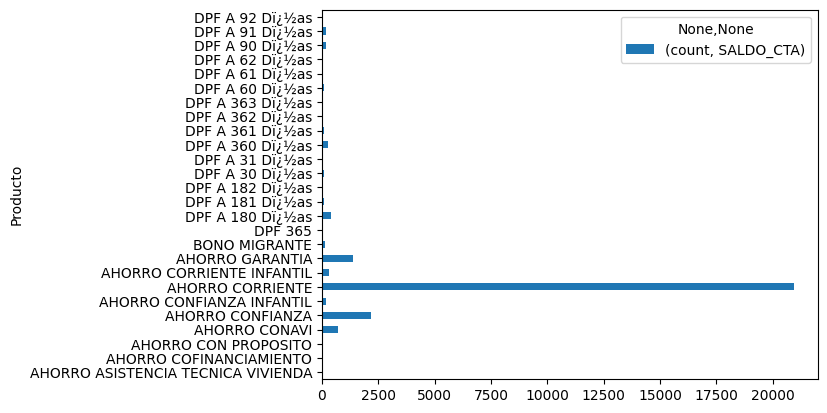

In [233]:
x.plot(kind='barh')

In [235]:
x.describe()

,count
,SALDO_CTA
count,26.000000
mean,1054.192308
std,4089.796494
min,1.000000
25%,12.250000
50%,98.000000
75%,236.250000
max,20961.000000
